## **ECONOMIC TREND**

In [1]:
# IMPORTING ALL THE REQUIRED LIBRARIES: 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### **READING THE DATA:**

In [2]:
def read_data(filename, index_col=0, format="%d-%M-%Y"):
    """Reads data from a file and parses the dates.

    Args:
        filename: The name of the file to read.
        index_col: The column of the file that contains the dates.
        format: The format of the dates in the file.

    Returns:
        A pandas DataFrame containing the data from the file.
    """
    df = pd.read_excel(filename, index_col=index_col)
    df.index = pd.to_datetime(df.index, format=format)
    return df

In [3]:
gdp = read_data('./data/Monthly-GDP-Data.xlsx')
y2by = read_data('./data/2-Year-Bond-Yield-Data.xlsx')
cs = read_data('./data/Credit-Spread-Data.xls')
spx = read_data('./data/USD-EU-Spot-Exchange-Rate.xls')
cpi = read_data('./data/CPI-Inflation-Data.xls')

In [135]:
dataset = pd.concat([gdp, y2by, cs, spx, cpi], axis=1)

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 917 entries, 1947-01-01 to 2023-05-01
Freq: MS
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gdp_data          376 non-null    float64
 1   2y_bond_yield     472 non-null    float64
 2   credit_spread     842 non-null    float64
 3   us_spot_exchange  293 non-null    float64
 4   cpi_inflation     917 non-null    float64
dtypes: float64(5)
memory usage: 43.0 KB


In [137]:
dataset

,gdp_data,2y_bond_yield,credit_spread,us_spot_exchange,cpi_inflation
date,,,,,
1947-01-01,NaN,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,NaN,21.950
...,...,...,...,...,...
2023-01-01,20301.070151,4.81,1.97,1.0777,300.536
2023-02-01,20247.747092,5.07,1.84,1.0702,301.648
2023-03-01,20245.057587,5.05,2.05,1.0711,301.808


In [138]:
sp500 = yf.download('^GSPC', start='2000-01-01', end='2023-04-04', interval='1mo', progress=False)['Adj Close']

In [139]:
sp500

Date
2000-01-01    1394.459961
2000-02-01    1366.420044
2000-03-01    1498.579956
2000-04-01    1452.430054
2000-05-01    1420.599976
                 ...     
2022-12-01    3839.500000
2023-01-01    4076.600098
2023-02-01    3970.149902
2023-03-01    4109.310059
2023-04-01    4169.479980
Name: Adj Close, Length: 280, dtype: float64

In [140]:
def create_pct_change_dataset(dataset):
    """
    Calculates the 1-year percentage change for a given dataset.

    Args:
        dataset (pandas.DataFrame): The input dataset containing the data.

    Returns:
        pandas.DataFrame: The dataset with the 1-year percentage change values.
    """
    data = dataset.dropna()
    
    # Calculate the 1-year percentage change
    data = data.pct_change(12)
    
    return data


data = create_pct_change_dataset(dataset)

In [141]:
dataset = pd.concat([data, sp500], axis=1)

In [142]:
dataset

,gdp_data,2y_bond_yield,credit_spread,us_spot_exchange,cpi_inflation,Adj Close
1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-01,0.007679,3.613208,0.070652,-0.062826,0.064449,3839.500000
2023-01-01,0.019982,2.671756,0.082418,-0.047716,0.063472,4076.600098
2023-02-01,0.015323,1.740541,-0.098039,-0.057009,0.059864,3970.149902
2023-03-01,0.015647,1.052846,-0.050926,-0.027952,0.049869,4109.310059


In [143]:
pct_change_data = dataset.dropna()

In [144]:
pct_change_data

,gdp_data,2y_bond_yield,credit_spread,us_spot_exchange,cpi_inflation,Adj Close
2000-01-01,0.044200,0.316850,-0.350195,-0.125960,0.027930,1394.459961
2000-02-01,0.041455,0.310284,-0.259414,-0.122199,0.032180,1366.420044
2000-03-01,0.041128,0.280000,-0.082609,-0.114183,0.037621,1498.579956
2000-04-01,0.054992,0.306595,0.047826,-0.116998,0.030139,1452.430054
2000-05-01,0.049737,0.315254,0.128440,-0.147789,0.031325,1420.599976
...,...,...,...,...,...,...
2022-12-01,0.007679,3.613208,0.070652,-0.062826,0.064449,3839.500000
2023-01-01,0.019982,2.671756,0.082418,-0.047716,0.063472,4076.600098
2023-02-01,0.015323,1.740541,-0.098039,-0.057009,0.059864,3970.149902
2023-03-01,0.015647,1.052846,-0.050926,-0.027952,0.049869,4109.310059


In [145]:
def generate_signals(trend):
    """Generates signals for a trading strategy based on the past 12 month change in economic trend.

    Args:
        trend: A pandas DataFrame containing the past 12 month change in economic trend.

    Returns:
        A pandas Series containing the signals.
    """
    signals = np.zeros(len(trend))
    signals[trend > 0] = 1
    signals[trend < 0] = -1
    return signals

In [161]:
def get_returns(spx, signals, factor):
    """
    Calculates the returns of a trading strategy based on the given signals and S&P500 prices.

    Args:
        spx (pandas.Series): A pandas Series containing the S&P500 prices.
        signals (pandas.Series): A pandas Series containing the signals.
        factor (int): An integer value determining the sign of the relationship.

    Returns:
        numpy.ndarray: An array containing the returns of the strategy.
    
    """
    # returns = np.ones(len(spx))
    # for i in range(len(spx) - 1):
    #     if signals[i]*factor == 1:
    #         returns[i + 1] = spx.iloc[i + 1] / spx.iloc[i]
    #     elif signals[i]*factor == -1:
    #         returns[i + 1] = 1 /  (spx.iloc[i + 1] / spx.iloc[i])
    # return returns

    returns = []
    for i, signal in enumerate(signals):
        if signal * factor == 1:
            returns.append(spx.iloc[i + 1] / spx.iloc[i])
        elif signal * factor == -1:
            returns.append(1 / (spx.iloc[i + 1] / spx.iloc[i]))
    return np.array(returns)

In [162]:
def get_cumulative_returns(returns):
    """Converts a returns array into a cumulative returns array.

    Args:
        returns (numpy.ndarray): A NumPy array containing the returns.

    Returns:
        numpy.ndarray: A NumPy array containing the cumulative returns.
    """
    # cumulative_returns = np.zeros(len(returns))
    # cumulative_returns[0] = returns[0]
    # for i in range(1, len(returns)):
    #     cumulative_returns[i] = cumulative_returns[i - 1] * returns[i]
    # return cumulative_returns

    cumulative_returns = []
    cumulative_returns.append(returns[0])
    for ret in enumerate(returns[1:]):
        cumulative_returns.append(cumulative_returns[-1] * ret)
    return np.array(cumulative_returns)

# GDP Growth Strategy: 

In [163]:
# Generate signals
signals = generate_signals(pct_change_data['gdp_data'])

In [164]:
returns = get_returns(sp500, signals,1)

In [165]:
strategy_cumulative_returns = get_cumulative_returns(returns)
benchmark_cumulative_returns = pct_change_data['Adj Close']/pct_change_data['Adj Close'][0]

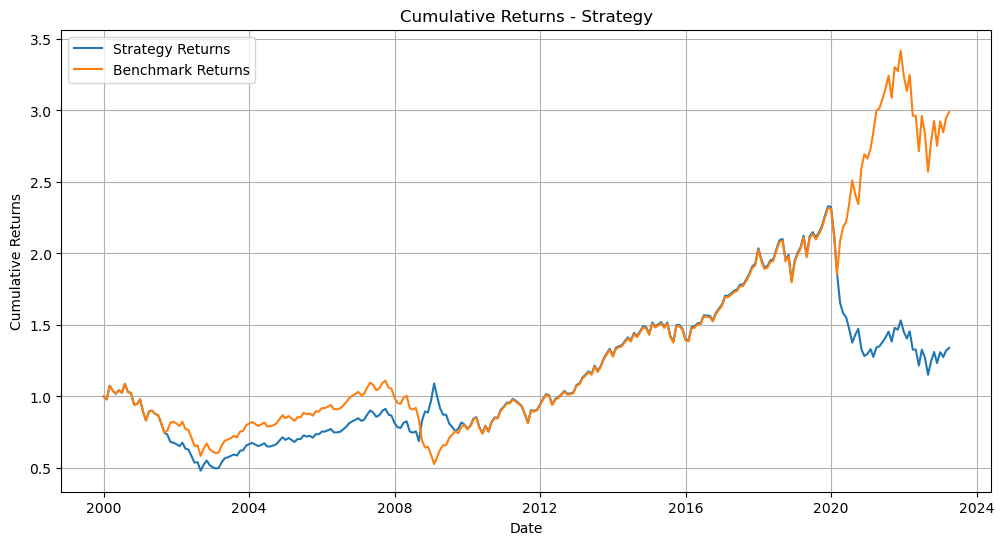

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, strategy_cumulative_returns, label='Strategy Returns')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()

# CPI Inflation Strategy: 

In [177]:
# Generate signals
cpi_signals = generate_signals(pct_change_data['cpi_inflation'])

In [178]:
cpi_returns = get_returns(sp500, cpi_signals, -1)

In [179]:
cpi_strategy_cumulative = get_cumulative_returns(cpi_returns)

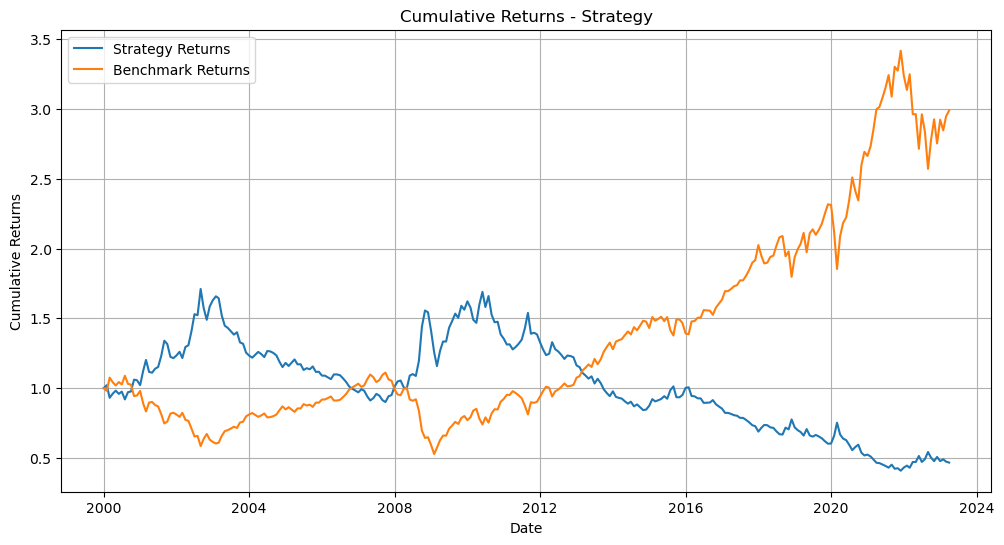

In [180]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, cpi_strategy_cumulative, label='Strategy Returns')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()

# International Trade Strategy: 

In [181]:
# Generate signals
it_signals = generate_signals(pct_change_data['us_spot_exchange'])
it_returns = get_returns(sp500, it_signals, 1)
it_strategy_cumulative = get_cumulative_returns(it_returns)

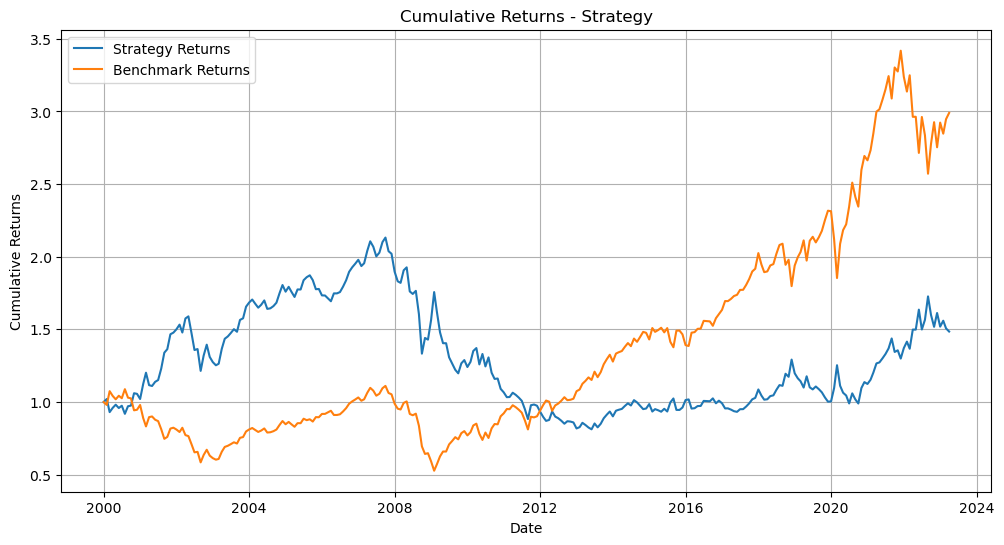

In [182]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, it_strategy_cumulative, label='Strategy Returns')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()

# Monetary Policy Strategy: 

In [183]:
mp_signals = generate_signals(pct_change_data['2y_bond_yield'])
mp_returns = get_returns(sp500, mp_signals, 1)
mp_strategy_cumulative = get_cumulative_returns(mp_returns)

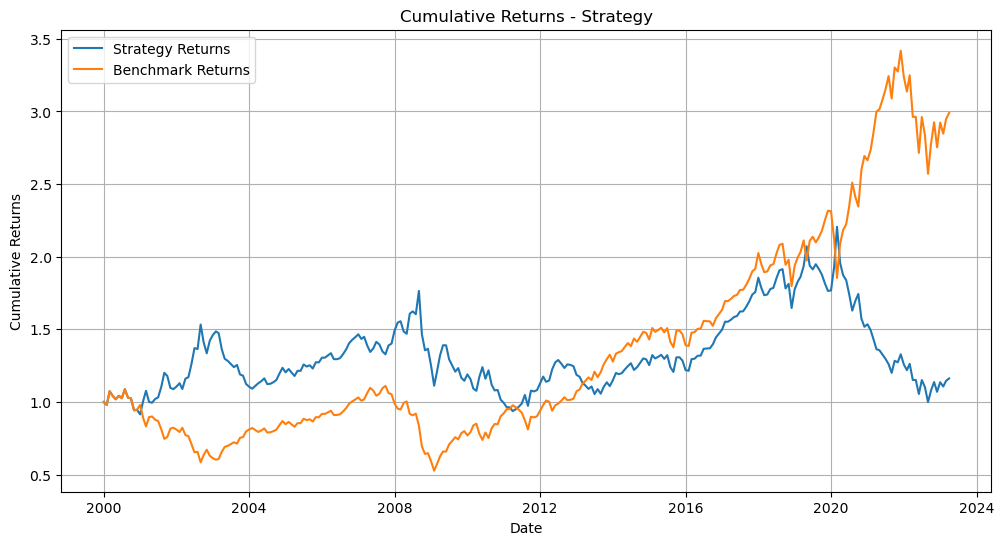

In [184]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, mp_strategy_cumulative, label='Strategy Returns')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()

# Risk Aversion:

In [189]:
cs_signals = generate_signals(pct_change_data['2y_bond_yield'])
cs_returns = get_returns(sp500, cs_signals, -1)
cs_strategy_cumulative = get_cumulative_returns(cs_returns)

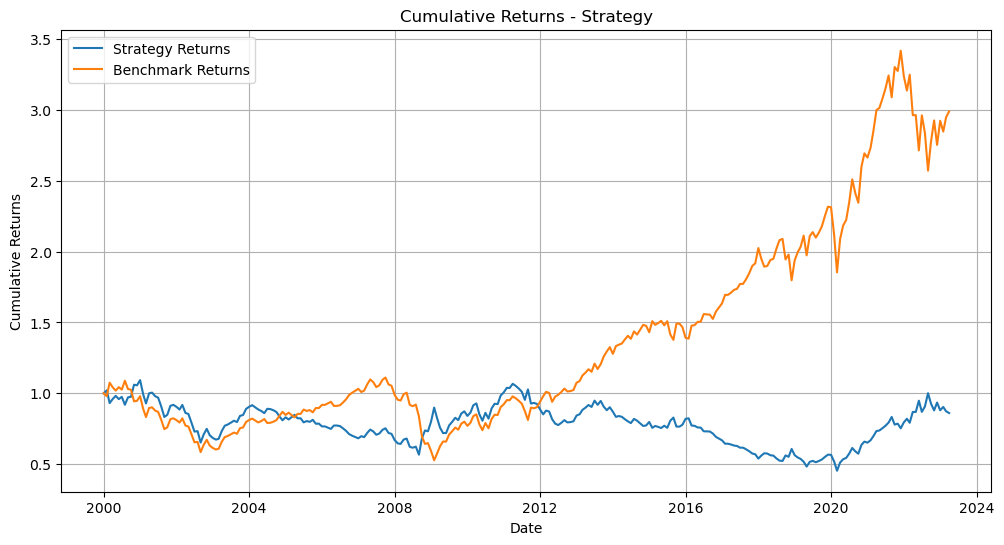

In [190]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, cs_strategy_cumulative, label='Strategy Returns')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()

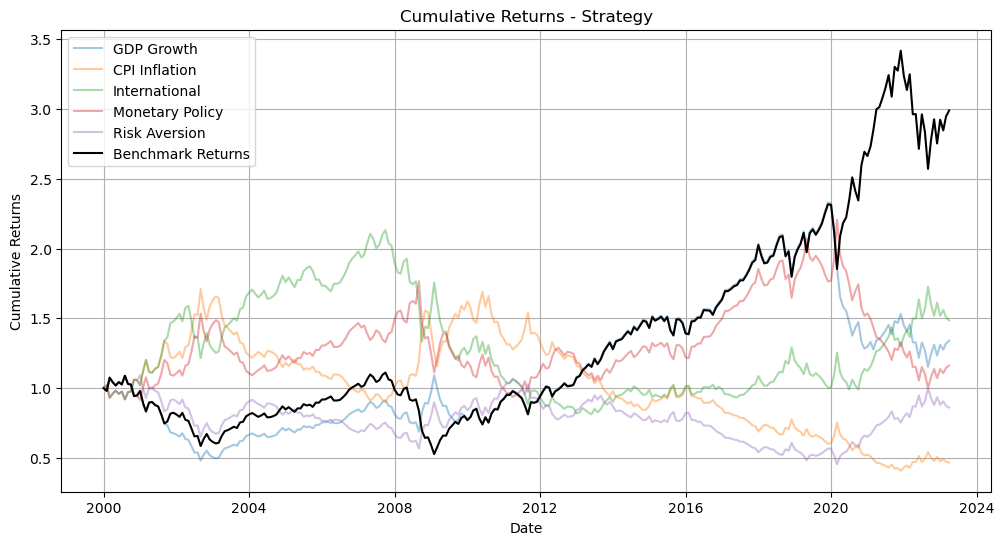

In [194]:
plt.figure(figsize=(12, 6))
plt.plot(benchmark_cumulative_returns.index, strategy_cumulative_returns, alpha=0.4, label='GDP Growth')
plt.plot(benchmark_cumulative_returns.index, cpi_strategy_cumulative, alpha=0.4, label='CPI Inflation')
plt.plot(benchmark_cumulative_returns.index, it_strategy_cumulative, alpha=0.4, label='International')
plt.plot(benchmark_cumulative_returns.index, mp_strategy_cumulative, alpha=0.4, label='Monetary Policy')
plt.plot(benchmark_cumulative_returns.index, cs_strategy_cumulative, alpha=0.4, label='Risk Aversion')
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, c = 'black', label='Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns - Strategy')
plt.legend()
plt.grid(True)
plt.show()